### Questions for the analysis

1. Show main actors (Star1) that appeared the most between 2000-2022? Limit the selection to top 10 actors only. 
2. What are their average metascore? Showing top 10 actors by their appearance count during 2020-2022 and their average metascore
3. How metascore and imdb_rating are correlated with each other over 2020-2022? Show it on graph. What genre shows the most difference between the ratings?
4. Show the most successful top-10 directors from top imdb 1000 films showing their average imdb_rating and box office earned. Show it as scatter plot. 
5. Show top 10 the most efficient films in terms of the ROI (box office / budget) over the period 1990 - 2022. Show it on graph
6. Test if there is any correlation between a budget of a film and its imdb or metascore rating (choose whichever you prefer). Present the result of the analysis on the graph showing the correlation between budgets and their metascore/imdb rating for the top10 films during 2000-2022

In [201]:
#importing necessary libraries and the csv file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\zyesn\Documents\Python\Project_2\Data\imdb_top_1000.csv'
df = pd.read_csv(file_path)

#Data preparation

#changign datatypes to be compatible for the analysis
df['Gross'] = df['Gross'].str.replace(',','')

#dataframe contain NaN values which do not allow to change the datatype for box office column. For the sake of the analysis let's change the datatype of the column hence delete rows that contain null values. 
df = df.dropna(subset='Gross')

#changing the datatype of the box office column to int
df['Gross'] = df['Gross'].astype(int)

#converting Released year column to int dt
# in dataframe in column released year there was one film Apollo 13 with a value of PG, hence was replaced to proper value = 1995
df.loc[966, 'Released_Year'] = '1995'
df['Released_Year'] = df['Released_Year'].astype(int)


In [202]:
df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


1. Show main actors (Star1) that appeared the most between 2000-2020? Limit the selection to top 10 actors only. 

In [203]:
#creating a df limiting to 2020 to 2022 movies only
df_2020_2022 = df[(df['Released_Year'] >= 2000) & (df['Released_Year'] <= 2020)]
df_top10_actors = df_2020_2022.groupby('Star1')['Series_Title'].agg('size').sort_values(ascending=False).head(10)
df_top10_actors

Star1
Leonardo DiCaprio    8
Christian Bale       7
Tom Hanks            6
Daniel Radcliffe     6
Aamir Khan           6
Jake Gyllenhaal      5
Denzel Washington    5
Russell Crowe        4
Joe Russo            4
Daniel Craig         4
Name: Series_Title, dtype: int64

2. What are their average metascore? Showing top 10 actors by their appearance count during 2020-2022 and their average metascore


In [204]:
#creating avg metascore values for the main actors for the period 2020 - 2022
df_top10_avg_metascore = df_2020_2022.groupby('Star1')['Meta_score'].agg(['size','mean']).sort_values(ascending=False, by='size').head(10)
df_top10_avg_metascore

,size,mean
Star1,,
Leonardo DiCaprio,8,74.375000
Christian Bale,7,72.000000
Tom Hanks,6,80.666667
Daniel Radcliffe,6,75.833333
Aamir Khan,6,75.500000
Jake Gyllenhaal,5,79.400000
Denzel Washington,5,63.200000
Russell Crowe,4,71.000000
Joe Russo,4,72.750000


3. How metascore and imdb_rating are correlated with each other over 2020-2020? Show it on graph. What genre shows the most difference between the ratings?

In [205]:
#calculating metascore and imdb rating over 2020 - 2022
#calculating metascore rating
df_meta_imbd_ratings = df_2020_2022.groupby('Released_Year')[['Meta_score','IMDB_Rating']].agg('mean')

In [206]:
# using pandas vectorized operations dividing meta score column by 10 to increase comparability between the ratings
df_meta_imbd_ratings['Meta_score'] = df_meta_imbd_ratings['Meta_score'] / 10

In [207]:
# Calculate the difference between Meta_score and IMDB_Rating
df_meta_imbd_ratings['Difference'] = abs(df_meta_imbd_ratings['Meta_score'] - df_meta_imbd_ratings['IMDB_Rating'])
max_diff_year = df_meta_imbd_ratings['Difference'].idxmax()  # Find the year with the largest difference

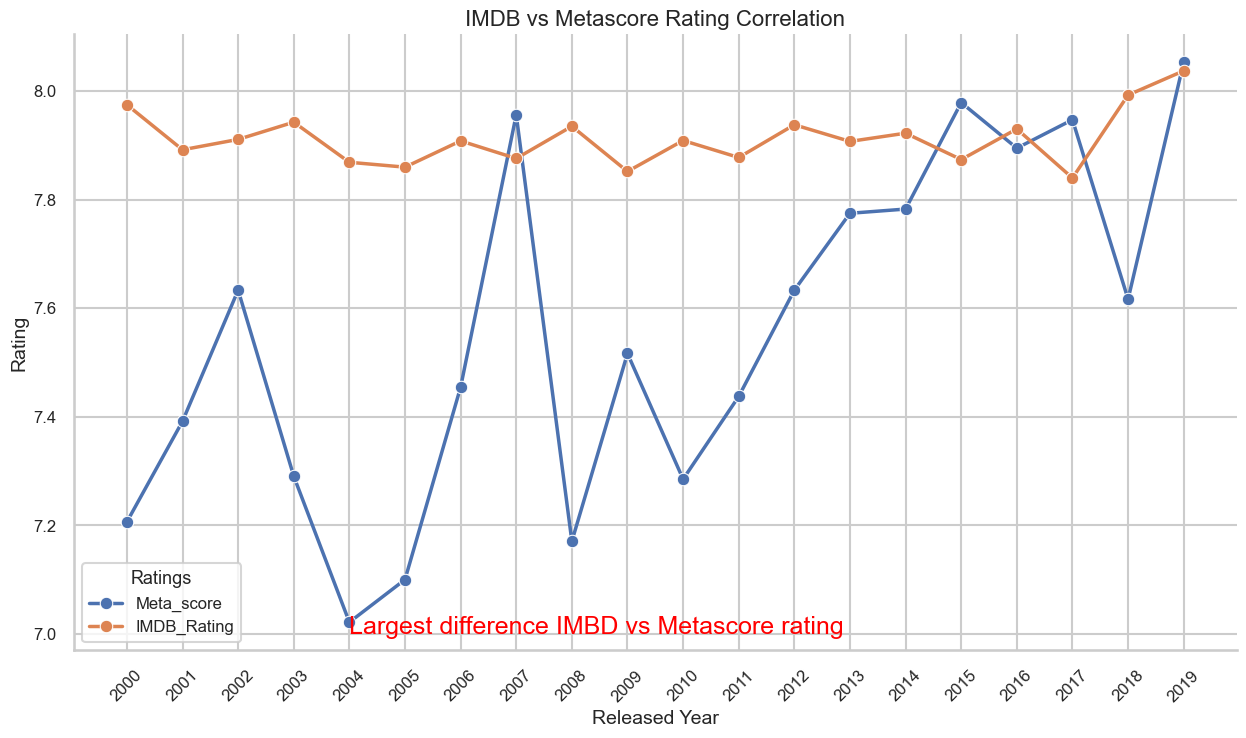

In [208]:
# Plotting the lines
plt.figure(figsize=(15, 8))
sns.lineplot(x=df_meta_imbd_ratings.index, y='Meta_score', data=df_meta_imbd_ratings, label='Meta_score', marker='o', linewidth=2.5)
sns.lineplot(x=df_meta_imbd_ratings.index, y='IMDB_Rating', data=df_meta_imbd_ratings, label='IMDB_Rating', marker='o', linewidth=2.5)
sns.despine()

# Set axis titles and main title
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('IMDB vs Metascore Rating Correlation', fontsize=16)

# Customize tick parameters
plt.xticks(rotation=45, fontsize=12, ticks=range(2000,2020))
plt.yticks(fontsize=12)

# Add legend to differentiate the lines
plt.legend(title='Ratings', fontsize=12, title_fontsize='13')

#highlightin the year with the highest difference
plt.text(max_diff_year, 7.0, 'Largest difference IMBD vs Metascore rating', color = 'red')

# Show the plot
plt.show()

#### Insights

- Divergence Between IMDB and Metascore Ratings:
The graph shows instances where there is a significant difference between the IMDB rating and the Metascore. Notably, in 2002 and 2009, there were large gaps, with the Metascore having more pronounced peaks and troughs compared to the steady trend in IMDB ratings. This suggests that critical reviews (Metascore) were more variable than audience ratings (IMDB), which maintained a consistent average rating over time.
- IMDB Ratings Are More Stable:
The IMDB ratings (orange line) are fairly stable throughout the years, maintaining a narrow range from approximately 7.8 to 8.2. This indicates that user reviews tend to be less influenced by external factors and exhibit less volatility compared to the critic-based Metascore, suggesting that audiences have a more consistently positive view of the films across these years.
- High differences in reception:
The highlighted point (annotated as "Largest difference IMDB vs Metascore rating") in the year 2004 shows that the Metascore rating dropped significantly compared to IMDB. In contrast, the IMDB rating remained relatively high. This suggests that the critical reception of movies released in that year was considerably harsher compared to audience reception, possibly indicating differing expectations or opinions between critics and audiences during that period.

#### 4. Show the most successful top-10 directors in terms of box office earned, showing their average imdb_rating and box office earned. Show it as scatter plot. 


In [209]:
df.head(2)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


In [210]:
top_10_directors = df.groupby('Director').agg({'IMDB_Rating': 'mean','Gross':'sum'}).sort_values(by = 'Gross', ascending=False).head(10)
top_10_directors

,IMDB_Rating,Gross
Director,,
Steven Spielberg,8.030769,2478133165
Anthony Russo,8.075000,2205039403
Christopher Nolan,8.462500,1937454106
James Cameron,8.080000,1748236602
Peter Jackson,8.400000,1597312443
J.J. Abrams,7.833333,1423170905
Brad Bird,7.900000,1099627795
Robert Zemeckis,8.120000,1049446456
David Yates,7.800000,978953721


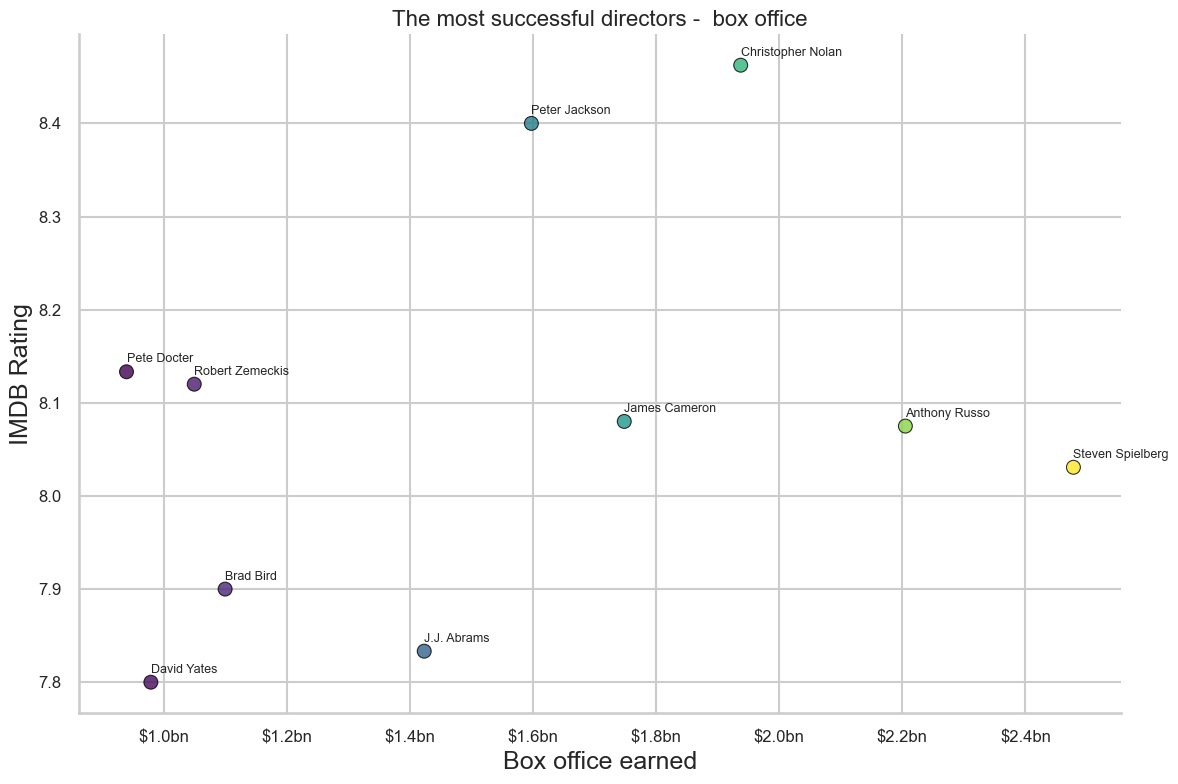

In [211]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data = top_10_directors,
    x = 'Gross', y = 'IMDB_Rating', 
    hue = 'Gross', palette='viridis', 
    s = 100, 
    edgecolor='black', 
    alpha=0.8)

sns.despine()
sns.set_theme(style='ticks')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${float(x/1000000000)}bn')) # presenting box office in bn

#adding text to each index
for i in range(top_10_directors.shape[0]):
    plt.text(
        top_10_directors['Gross'].iloc[i],
        top_10_directors['IMDB_Rating'].iloc[i] + 0.01, #avoid overlaping
        top_10_directors.index[i],
        fontsize = 9,
        ha = 'left'
    )

#further design adjustments

plt.title('The most successful directors -  box office', fontsize = '16')
plt.xlabel('Box office earned')
plt.ylabel('IMDB Rating')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.legend().remove()
plt.show()

#### Insights

- High Box Office vs Audience Ratings:
Steven Spielberg and Anthony Russo have the highest box office earnings, each exceeding $2 billion. Despite their significant financial success, their average IMDB ratings are around 8.0 to 8.2, indicating that high box office revenue does not always correlate with higher audience ratings. It suggests that these directors are commercially successful but do not necessarily receive the highest audience ratings.
- Consistent High Ratings with Moderate Earnings:
Christopher Nolan and Peter Jackson are the top-rated directors, with IMDB ratings above 8.3. Their box office earnings are around $1.5 to $1.8 billion, indicating that their work is highly rated by audiences while also being financially successful. This suggests that they have struck a balance between critical acclaim and box office performance.
- Diverse Success Levels:
Directors like David Yates, Brad Bird, and J.J. Abrams are on the lower end of both box office revenue and audience rating, with gross earnings around $1.0 to $1.4 billion and IMDB ratings ranging from 7.8 to 8.1. This indicates that while they are commercially viable, their movies do not achieve the same level of critical acclaim or financial success as directors like Spielberg or Nolan.

#### 5. Show top 10 the most efficient films in terms of the ROI (box office / budget) over the period 1990 - 2022.


In [212]:
# importing and reading csv file - Budget for top 1000 films
budget_file_path = r'C:\Users\zyesn\Documents\Python\Project_2\Data\Budgets_top1000.csv'
df_budget_1000 = pd.read_csv(budget_file_path)

#rename columns 
df_budget_1000 = df_budget_1000.rename(columns={'Production\nBudget':'film_name','Domestic\nGross':'Budget','Movie':'Date'})

#removing non integers value with subsequent conversion to integer
df_budget_1000['Budget'] = df_budget_1000['Budget'].str.replace(r'[^\d]', '', regex=True)
df_budget_1000['Budget'] = df_budget_1000['Budget'].astype(int)

In [220]:
#limiting df to 1990-2020 period
df_1990_2020 = df[(df['Released_Year'] >= 1990) & (df['Released_Year'] <=2020)]

In [214]:
#sorting the values and limiting to top10 based on box office
df_gross_top_10 = df_1990_2020.sort_values(by='Gross', ascending = False).head(10)

In [215]:
#renaming column names in df so that both datasets can be merged based on film names
df_gross_top_10.loc[477,'Series_Title'] = 'Star Wars Ep. VII: The Force Awakens'
df_gross_top_10.loc[582,'Series_Title'] = 'Rogue One: A Star Wars Story'

In [216]:
#Left joining datasets on film name column 
df_merged = pd.merge(df_gross_top_10, df_budget_1000, left_on='Series_Title', right_on='film_name', how='left')

In [217]:
df_merged = df_merged[['Series_Title','Gross','Budget']]
df_merged['ROI'] = df_merged['Gross'] / df_merged['Budget']


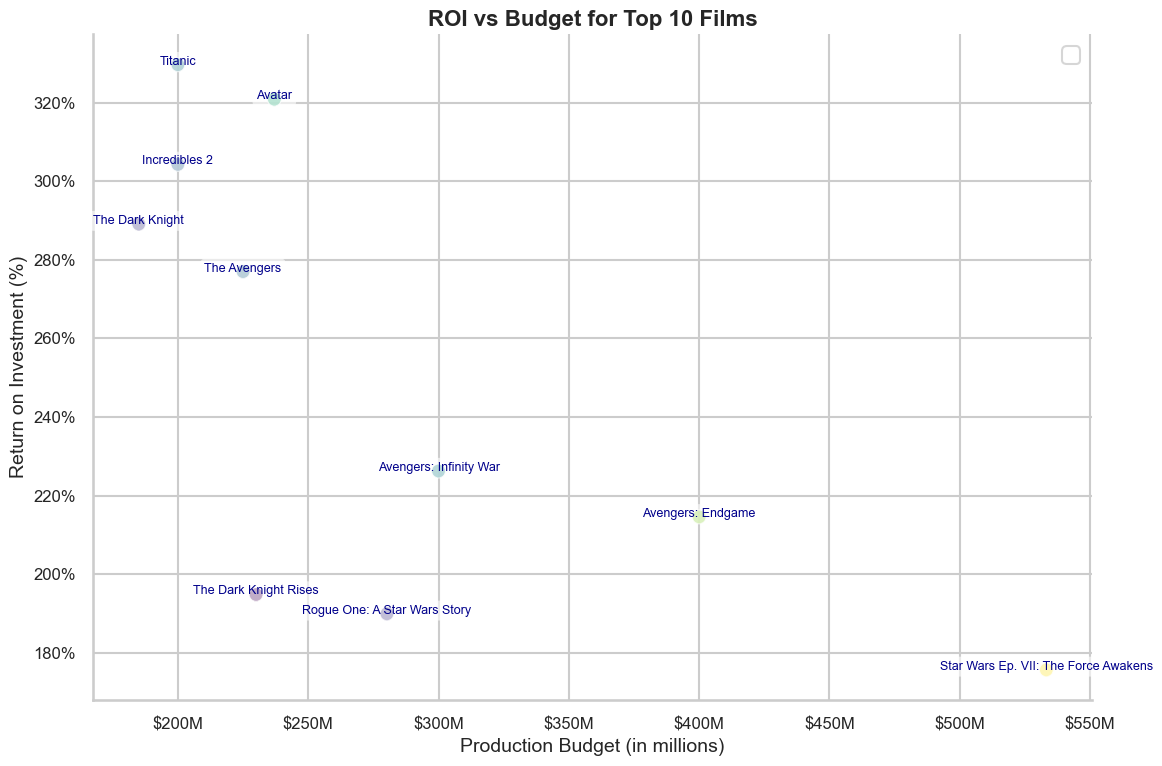

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Setting theme and style for better readability and aesthetics
sns.set_theme(style='whitegrid', context='talk')

# Scatter plot with Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df_merged, 
    x='Budget', 
    y='ROI', 
    hue='Gross', 
    palette='viridis', 
    s=100,  # Marker size for better visibility
    edgecolor='w',  # White edges for markers for contrast
    alpha=0.8  # Transparency for better overlapping visibility
)

# Removing top and right spines for cleaner look
sns.despine()

# Accessing current axis
ax = plt.gca()

# Format x-axis: Presenting budget in millions with dollar sign
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x / 1_000_000)}M'))

# Adding text labels to each point to indicate the title
for i in range(df_merged.shape[0]):
    plt.text(
        df_merged['Budget'].iloc[i],
        df_merged['ROI'].iloc[i],
        df_merged['Series_Title'].iloc[i],
        fontsize=9,
        ha='center',
        color='darkblue',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3')
    )

# Formatting the y-axis to show ROI as percentage
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

# Setting further design elements
plt.title('ROI vs Budget for Top 10 Films', fontsize=16, fontweight='bold')
plt.xlabel('Production Budget (in millions)', fontsize=14)
plt.ylabel('Return on Investment (%)', fontsize=14)

# Customize ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Removing the legend
plt.legend('')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Insights

- Higher Budget Does Not Always Correlate with Higher ROI:
"Avatar" had a relatively high ROI of around 320% with a moderate production budget of about $300M, which is one of the highest ROIs in the dataset. In contrast, "Star Wars Episode VII: The Force Awakens" had the highest budget of approximately $550M, but its ROI was significantly lower (around 180%). This indicates that higher production budgets do not necessarily result in higher profitability.
- Moderate Budget Films with High ROI:
Movies like "Incredibles 2" and "The Dark Knight" achieved an ROI of over 300% with a production budget of around $200M to $250M. These films demonstrate that a more moderate budget can yield very high returns, suggesting that a carefully managed production budget combined with strong audience demand can drive substantial profitability.
- Avengers Films Have a Consistent ROI Despite High Budgets:
Films like "Avengers: Endgame" and "Avengers: Infinity War" had production budgets of $300M to $400M, with consistent ROIs between 220% to 260%. While these budgets are among the higher range in the dataset, their returns are solid, albeit not the highest in terms of percentage. This suggests that while Avengers films do well at the box office, their ROI is more balanced due to the substantial investment required for their production.

#### 6. Test if there is any correlation between a budget of a film and its imdb or metascore rating (choose whichever you prefer). Present the result of the analysis on the graph showing the correlation between budgets and their metascore/imdb rating for the top10 films during 2020-2022

In [222]:
df_merged

,Series_Title,Gross,Budget,ROI
0,Star Wars Ep. VII: The Force Awakens,936662225,533200000,1.756681
1,Avengers: Endgame,858373000,400000000,2.145932
2,Avatar,760507625,237000000,3.208893
3,Avengers: Infinity War,678815482,300000000,2.262718
4,Titanic,659325379,200000000,3.296627
5,The Avengers,623279547,225000000,2.770131
6,Incredibles 2,608581744,200000000,3.042909
7,The Dark Knight,534858444,185000000,2.891127
8,Rogue One: A Star Wars Story,532177324,280200000,1.899277
9,The Dark Knight Rises,448139099,230000000,1.948431
